In [103]:
#Imported the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

In [73]:
#Loading the dataset
df = pd.read_csv('/kaggle/input/academic-success/train.csv')

In [74]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [75]:
#Checking type of columns , nulls and number of records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [76]:
#Checking number of categorical classes
df['Target'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

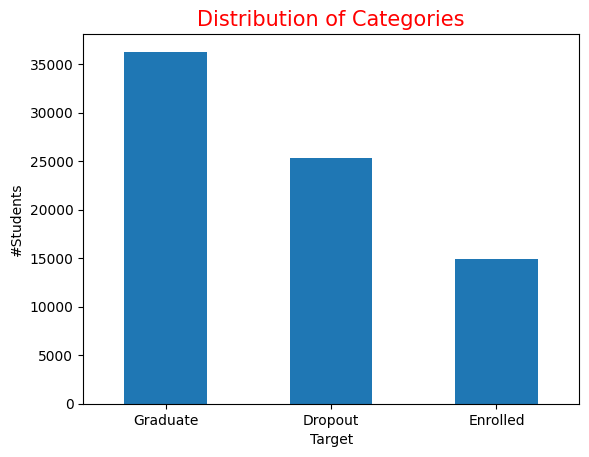

In [80]:
df['Target'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Distribution of Categories",fontsize=15,c='r')
plt.ylabel("#Students")
plt.show()

In [81]:
#Mapping the categorical classes into a numerical codes
df['Target']=df['Target'].map({'Graduate':0,'Dropout':1,'Enrolled':2})

In [82]:
#checking the pearson's co-relation with the target
df.corr()['Target'].sort_values()

Curricular units 2nd sem (approved)              -0.458061
Curricular units 1st sem (approved)              -0.406249
Scholarship holder                               -0.327580
Curricular units 2nd sem (grade)                 -0.291505
Curricular units 1st sem (grade)                 -0.272594
Curricular units 2nd sem (enrolled)              -0.213194
Curricular units 1st sem (enrolled)              -0.188270
Admission grade                                  -0.153127
Previous qualification (grade)                   -0.152562
Tuition fees up to date                          -0.137938
Application order                                -0.113817
Displaced                                        -0.084572
GDP                                              -0.066999
Unemployment rate                                -0.055411
Daytime/evening attendance                       -0.048478
Course                                           -0.048335
Curricular units 2nd sem (credited)              -0.0364

<Axes: >

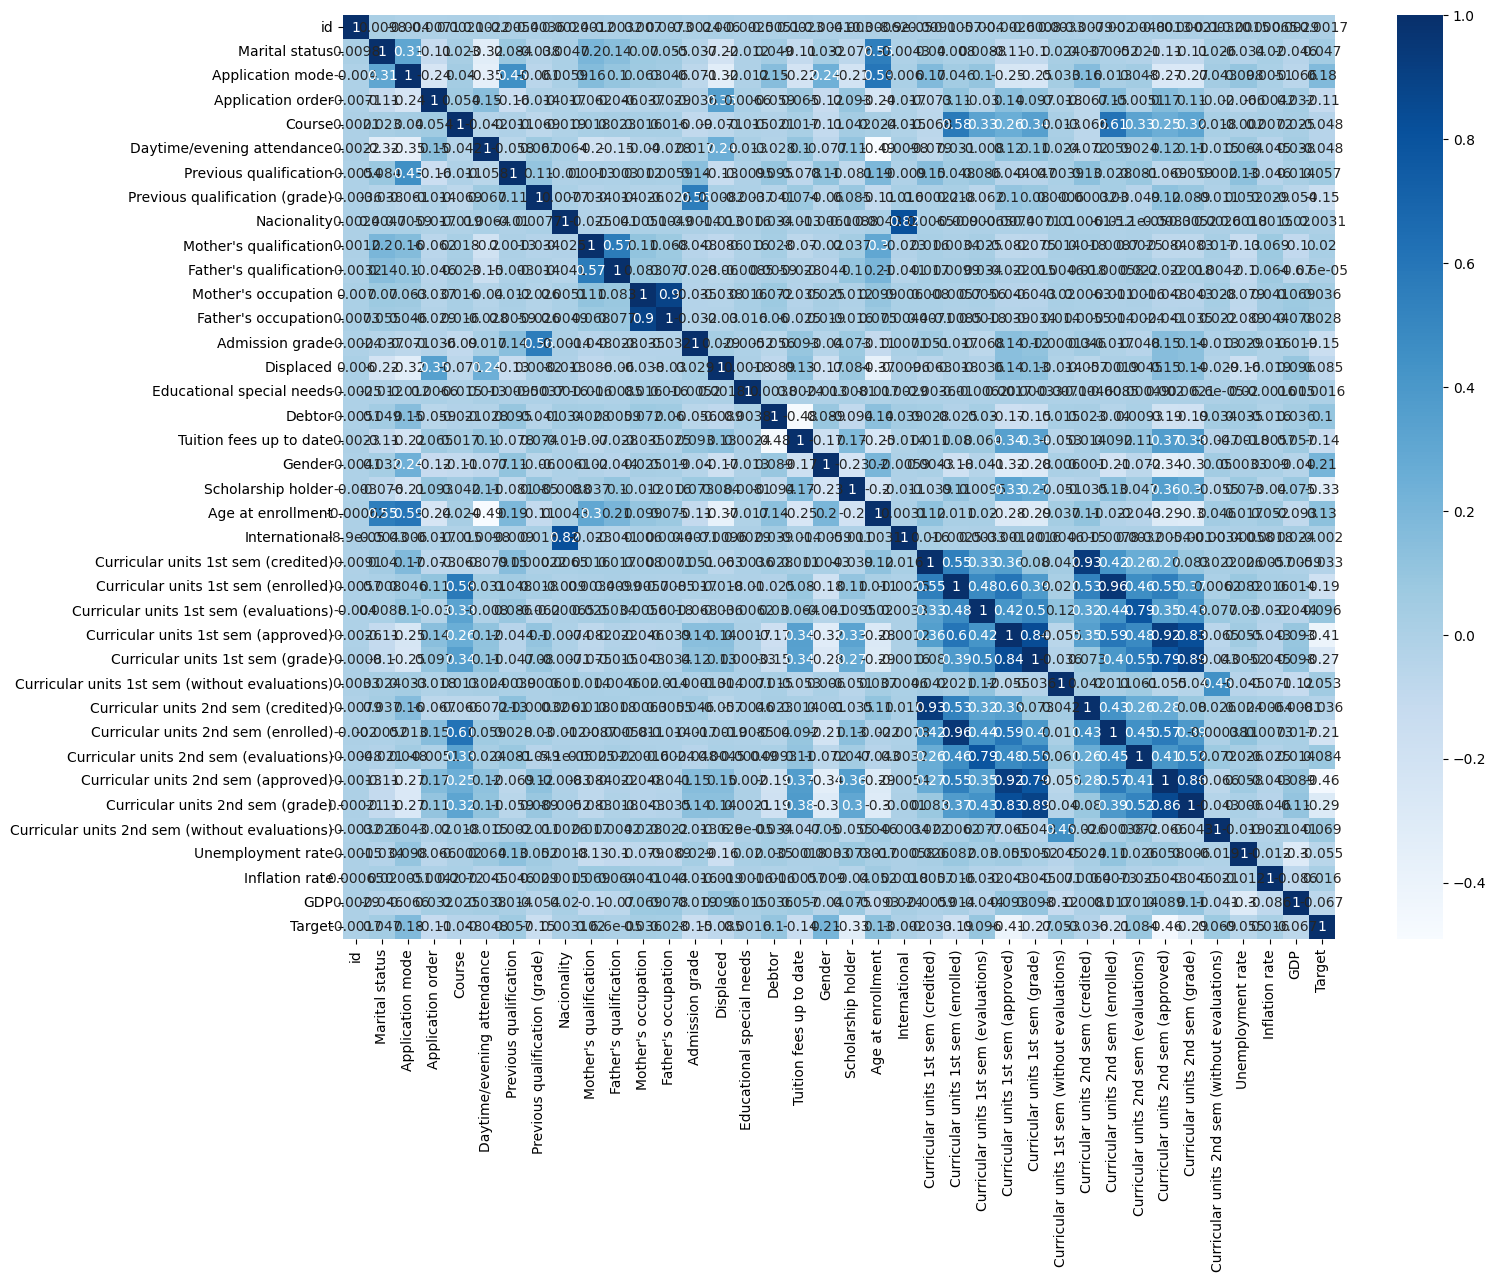

In [83]:
#Heatmap for correlation
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr() , cmap='Blues',annot=True)

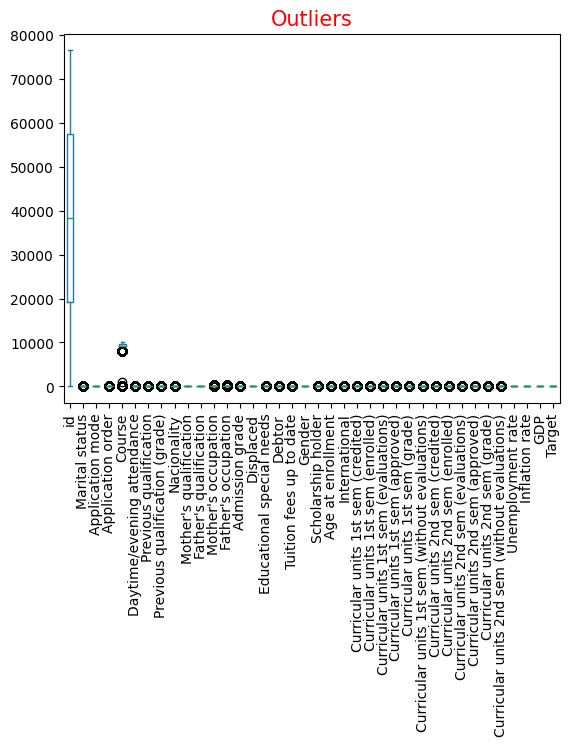

In [86]:
#Boxplot for checking outliers
df.plot(kind='box')
plt.title('Outliers',c='r',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [87]:
#There are outlier we have to use Robust Scaler for the outlier treament

In [88]:
#Creating X and Y for model training
X= df.drop(columns=['id','Target'],axis=1)
y= df['Target']

In [89]:
#Spliting the data in test and train for training and testing the model , 30% data for test and rest 70% for training
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [90]:
#Created a column transformer 
ct1 = make_column_transformer(
                        (RobustScaler(),X.columns))

In [106]:
#created a pipeline for model training using XBGClassifier
pi = make_pipeline(ct1,XGBClassifier())

In [107]:
#Fitting the Pipeline
pi.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupa...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [94]:
#train and test predicts for model evaluatuon
train_predict=pi.predict(X_train)
test_predict=pi.predict(X_test)

In [102]:
print("Classification Report for Train Predicts ::")
print(classification_report(train_predict,y_train))

Classification Report for Train Predicts ::
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     27008
           1       0.88      0.94      0.91     16533
           2       0.74      0.77      0.76     10021

    accuracy                           0.89     53562
   macro avg       0.86      0.87      0.86     53562
weighted avg       0.89      0.89      0.89     53562



In [101]:
print("Classification Report for Test Predicts ::")
print(classification_report(test_predict,y_test))

Classification Report for Test Predicts 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     11739
           1       0.84      0.90      0.87      7087
           2       0.61      0.65      0.63      4130

    accuracy                           0.83     22956
   macro avg       0.79      0.80      0.80     22956
weighted avg       0.84      0.83      0.84     22956



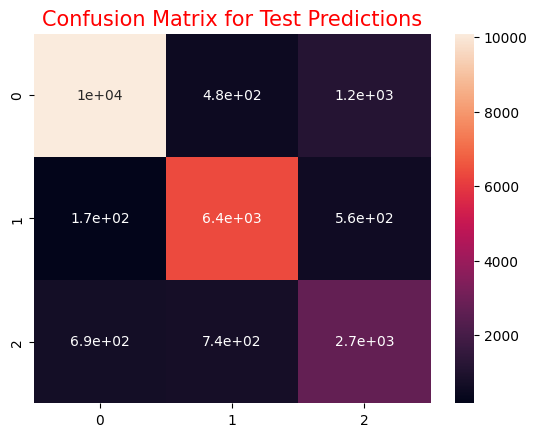

In [117]:
sns.heatmap(data = confusion_matrix(test_predict,y_test),annot=True)
plt.title('Confusion Matrix for Test Predictions',fontsize=15,c='r')
plt.show()

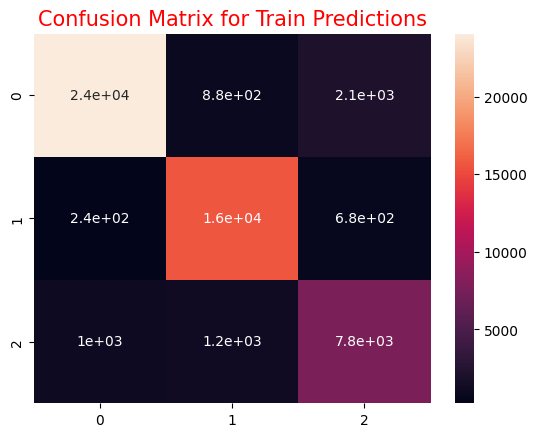

In [118]:
sns.heatmap(data = confusion_matrix(train_predict,y_train),annot=True)
plt.title('Confusion Matrix for Train Predictions',fontsize=15,c='r')
plt.show()

In [41]:
#using Cross validation to check the accurate accuracy of model
cv = cross_val_score(estimator=pi ,X=X,y=y , cv=3)

In [42]:
#Correct Accuracy
cv.mean()

0.8293342742884026

In [51]:
#List of paramaters of XGBClassifer for hyper parameter tuning
param_grid = {
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__min_child_weight': [1, 3, 5],
    'xgbclassifier__subsample': [0.5, 0.7, 1.0],
    'xgbclassifier__colsample_bytree': [0.5, 0.7, 1.0],
    'xgbclassifier__n_estimators': [100]
}

In [112]:
#Using Randamise Search CV for hyperparameter tuning
gs = RandomizedSearchCV(estimator=pi , param_distributions=param_grid , cv=3)

In [113]:
#Hyperparameter tuning
gs.fit(X,y)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('robustscaler',
                                                                               RobustScaler(),
                                                                               Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'M...
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            objective='multi:softprob', ...))]),
                   param_distributions={'xgbclassifier__colsample_bytree': [0.5,
                                                                            0.7,
                                                                            1.0],
                                        'xgbclassifier__learning_rate': [0.01,
                                                                         0.1,
                                                                         0.2],
                                        'xgbclassifier__max_depth': [3, 5, 7],
                                        'xgbclassifier__min_child_weight': [1,
                                                                            3,
                                                                            5],
                                        'xgbclassifier__n_estimators': [100],
                                        'xgbclassifier__subsample': [0.5, 0.7,
                                                                     1.0]})

In [114]:
#Best accuracy after hyper parameter tuning
gs.best_score_

0.8307195692516793

In [55]:
#Assignng the best model in our pipeline
pi = gs.best_estimator_

In [56]:
#Loaded the test dataset
test = pd.read_csv('/kaggle/input/academic-success/test.csv')

In [57]:
test.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [58]:
ab=test.drop(columns=['id'],axis=1)

In [59]:
#Predicting for test data set using our best model
sub=pi.predict(ab)

In [61]:
test['Target'] = sub

In [62]:
#Unmapping or categorical classes
test['Target']=test['Target'].map({0:'Graduate',1:'Dropout',2:'Enrolled'})

In [63]:
#created a df for submissing
submit= test[['id','Target']]

In [64]:
submit.to_csv('mine4.csv',index=False)